# Лабораторная работа №3. Фильтрация и выделение контуров

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
import scipy
import warnings
warnings.filterwarnings('ignore')

(-0.5, 1279.5, 1073.5, -0.5)

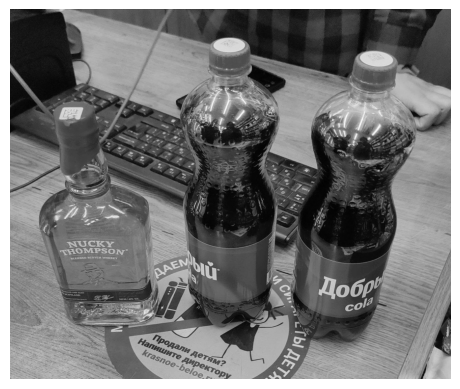

In [ ]:
I = cv.imread('table.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(I, cmap='gray')
plt.axis('off')

## Типы шумов

### Импульсный шум

(-0.5, 1279.5, 1073.5, -0.5)

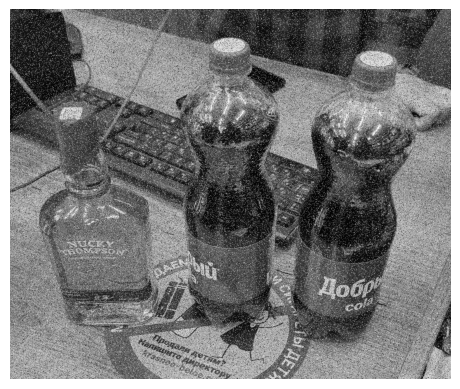

In [ ]:
I_sp = random_noise(I, 's&p', amount = 0.15) # amount = 0.15, salt_vs_pepper = 0.5
plt.imshow(I_sp, cmap='gray')
plt.axis('off')

### Аддитивный шум

(-0.5, 1279.5, 1073.5, -0.5)

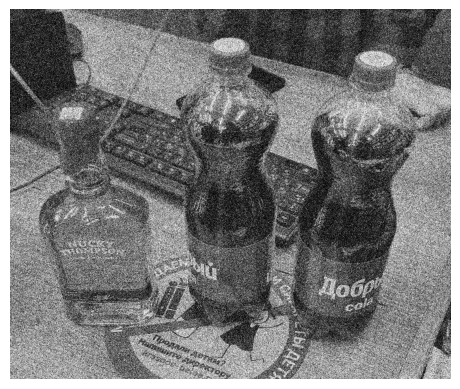

In [ ]:
I_gaussian = random_noise(I, 'gaussian', mean = 0, var = 0.1) # mean = 0, var = 0.1
plt.imshow(I_gaussian, cmap='gray')
plt.axis('off')

### Мультипликативный шум

(-0.5, 1279.5, 1073.5, -0.5)

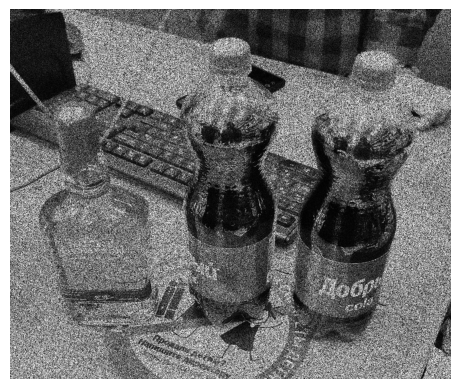

In [ ]:
I_speckle = random_noise(I, 'speckle', mean = 0, var = 1) # mean = 0, var = 1
plt.imshow(I_speckle, cmap='gray')
plt.axis('off')

### Шум квантования

(-0.5, 1279.5, 1073.5, -0.5)

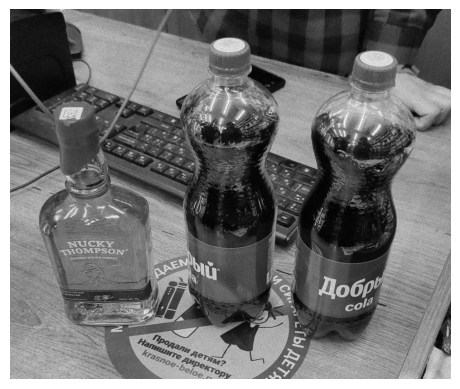

In [ ]:
I_poisson = random_noise(I, 'poisson')
plt.imshow(I_poisson, cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 1073.5, -0.5)

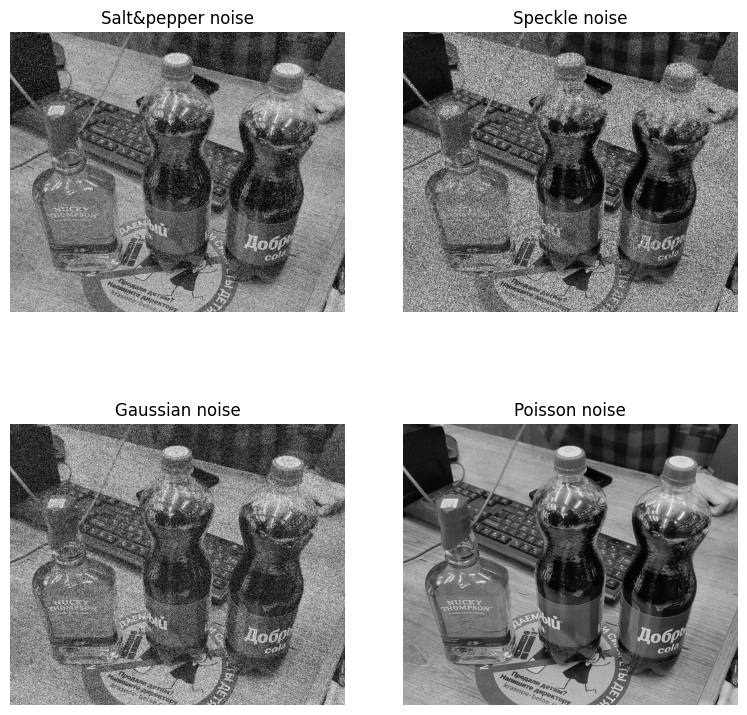

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout()
plt.sca(axs[0][0])
plt.title('Salt&pepper noise')
plt.imshow(I_sp, cmap='gray')
plt.axis('off')
plt.sca(axs[0][1])
plt.title('Speckle noise')
plt.imshow(I_speckle, cmap='gray')
plt.axis('off')
plt.sca(axs[1][0])
plt.title('Gaussian noise')
plt.imshow(I_gaussian, cmap='gray')
plt.axis('off')
plt.sca(axs[1][1])
plt.title('Poisson noise')
plt.imshow(I_poisson, cmap='gray')
plt.axis('off')

## Низкочастотная фильтрация

### Фильтр Гаусса

(-0.5, 1279.5, 1073.5, -0.5)

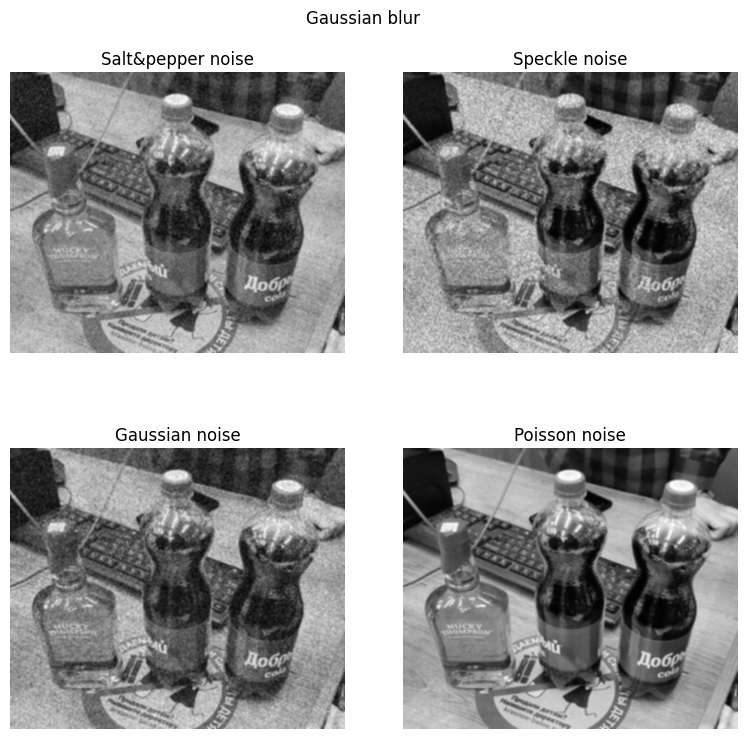

In [ ]:
ksize = (9, 9)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Gaussian blur')
fig.tight_layout()
plt.sca(axs[0][0])
plt.title('Salt&pepper noise')
I_gaussfilt_sp = cv.blur(I_sp, ksize)
plt.imshow(I_gaussfilt_sp, cmap='gray')
plt.axis('off')
plt.sca(axs[0][1])
plt.title('Speckle noise')
I_gaussfilt_speckle = cv.blur(I_speckle, ksize)
plt.imshow(I_gaussfilt_speckle, cmap='gray')
plt.axis('off')
plt.sca(axs[1][0])
plt.title('Gaussian noise')
I_gaussfilt_gaussian = cv.blur(I_gaussian, ksize)
plt.imshow(I_gaussfilt_gaussian, cmap='gray')
plt.axis('off')
plt.sca(axs[1][1])
plt.title('Poisson noise')
I_gaussfilt_poisson = cv.blur(I_poisson, ksize)
plt.imshow(I_gaussfilt_poisson, cmap='gray')
plt.axis('off')

### Контргармонический усредняющий фильтр

In [ ]:
def contra_harmonic_mean_filter(I, Q, ksize=3):
  if ksize % 2 == 0 or ksize < 3:
    raise AssertionError('ksize should be >= 3 and ksize % 2 == 1')
  h, w = I.shape
  I_new = np.zeros((h, w))
  for x in range(ksize // 2, h - ksize // 2):
    for y in range(ksize // 2, w - ksize // 2):
      n, d = 0, 0
      mask = I[x - ksize // 2:x + ksize // 2, y - ksize // 2:y + ksize // 2]
      n = np.sum(np.power(mask, Q + 1))
      d = np.sum(np.power(mask, Q))
      I_new[x, y] = n / d
  return I_new.clip(0, 255)

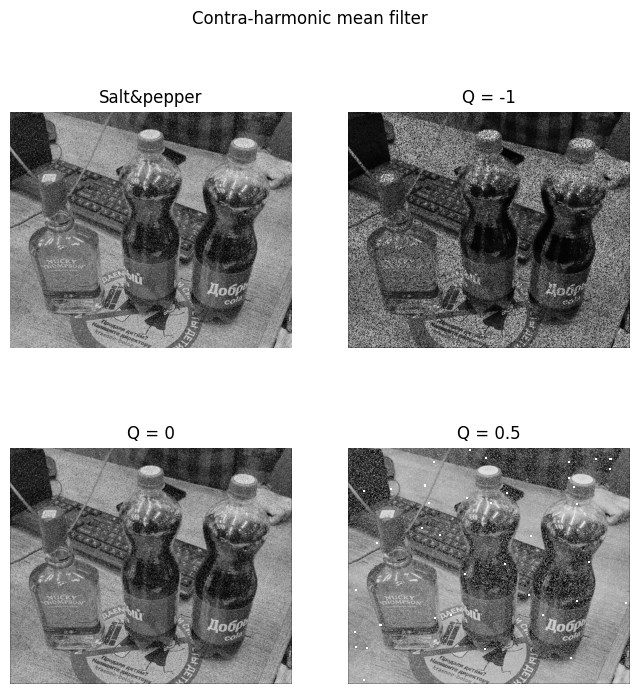

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Contra-harmonic mean filter')
plt.sca(axs[0][0])
plt.title('Salt&pepper')
plt.imshow(I_sp, cmap='gray')
plt.axis('off')
for i, Q in enumerate([-1, 0, 0.5]):
  plt.sca(axs[(i + 1) // 2][(i + 1) % 2])
  plt.title(f'Q = {Q}')
  I_chmfilt = contra_harmonic_mean_filter(I_sp, Q)
  plt.imshow(I_chmfilt, cmap='gray')
  plt.axis('off')

## Нелинейная фильтрация

### Медианная фильтрация

(-0.5, 1279.5, 1073.5, -0.5)

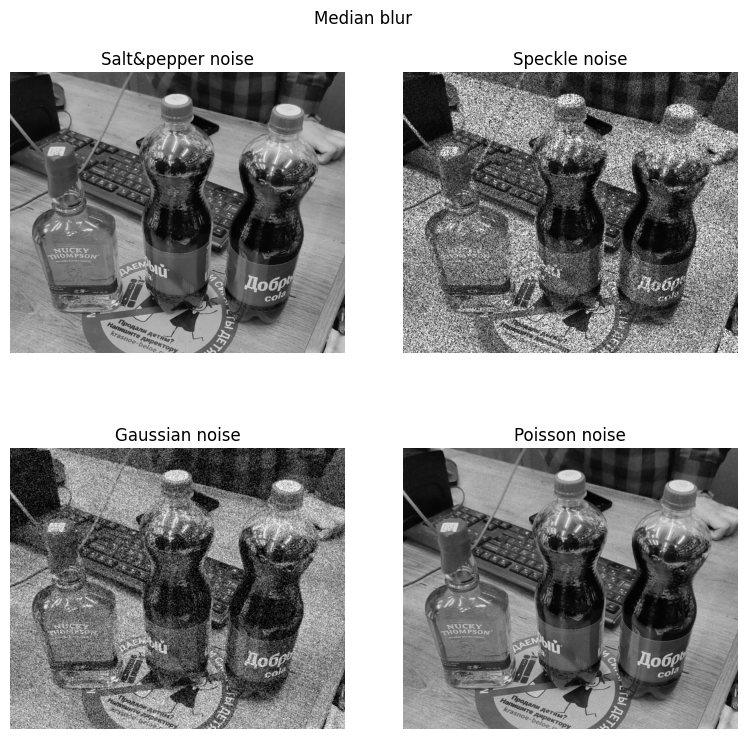

In [ ]:
ksize = 3
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Median blur')
fig.tight_layout()
plt.sca(axs[0][0])
plt.title('Salt&pepper noise')
I_medfilt_sp = cv.medianBlur(I_sp.astype('float32'), ksize)
plt.imshow(I_medfilt_sp, cmap='gray')
plt.axis('off')
plt.sca(axs[0][1])
plt.title('Speckle noise')
I_medfilt_speckle = cv.medianBlur(I_speckle.astype('float32'), ksize)
plt.imshow(I_medfilt_speckle, cmap='gray')
plt.axis('off')
plt.sca(axs[1][0])
plt.title('Gaussian noise')
I_medfilt_gaussian = cv.medianBlur(I_gaussian.astype('float32'), ksize)
plt.imshow(I_medfilt_gaussian, cmap='gray')
plt.axis('off')
plt.sca(axs[1][1])
plt.title('Poisson noise')
I_medfilt_poisson = cv.medianBlur(I_poisson.astype('float32'), ksize)
plt.imshow(I_medfilt_poisson, cmap='gray')
plt.axis('off')

### Взвешенная медианная фильтрация

In [ ]:
def weighted_median_filter(I, ksize=3):
  rank = 4
  kernel = np.ones((ksize, ksize) , dtype = np.float32)
  rows, cols = I.shape

  I_copy = I
  I_copy = cv.copyMakeBorder(I_copy, (ksize - 1) // 2, ksize // 2, (ksize - 1) // 2, ksize // 2, cv.BORDER_REPLICATE)

  I_layers = np.zeros(I.shape + (ksize * ksize, ), dtype=np.float32)
  for i in range(ksize):
    for j in range(ksize):
      I_layers[:, :, i * ksize + j] = kernel[i, j] * I_copy[i:i + rows, j:j + cols]
  I_layers.sort()
  I_out = I_layers[:, :, rank]
  return I_out

(-0.5, 1279.5, 1073.5, -0.5)

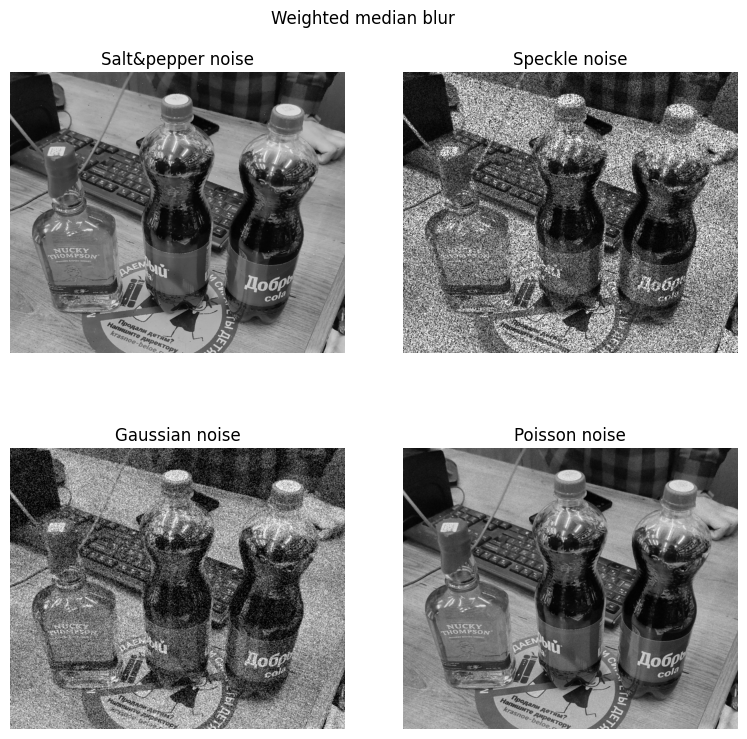

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Weighted median blur')
fig.tight_layout()
plt.sca(axs[0][0])
plt.title('Salt&pepper noise')
I_wmedfilt_sp = weighted_median_filter(I_sp)
plt.imshow(I_wmedfilt_sp, cmap='gray')
plt.axis('off')
plt.sca(axs[0][1])
plt.title('Speckle noise')
I_wmedfilt_speckle = weighted_median_filter(I_speckle)
plt.imshow(I_wmedfilt_speckle, cmap='gray')
plt.axis('off')
plt.sca(axs[1][0])
plt.title('Gaussian noise')
I_wmedfilt_gaussian = weighted_median_filter(I_gaussian)
plt.imshow(I_wmedfilt_gaussian, cmap='gray')
plt.axis('off')
plt.sca(axs[1][1])
plt.title('Poisson noise')
I_wmedfilt_poisson = weighted_median_filter(I_poisson)
plt.imshow(I_wmedfilt_poisson, cmap='gray')
plt.axis('off')

### Адаптивная медианная фильтрация

In [ ]:
def adaptive_median_filter(img, S_max):
    height, width = img.shape
    filtered_img = np.zeros_like(img)

    for i in range(S_max // 2, height - S_max // 2):
        for j in range(S_max // 2, width - S_max // 2):
            filtered_img[i, j] = find_median(img, i, j, S_max)

    return filtered_img

def find_median(img, x, y, S):
    max_size = S // 2
    window_size = 3

    while window_size <= S:
        window = img[x-max_size:x+max_size+1, y-max_size:y+max_size+1]
        window_flat = window.flatten()
        window_flat.sort()

        min_val = window_flat[0]
        max_val = window_flat[-1]
        median = window_flat[len(window_flat) // 2]

        if min_val < median and median < max_val:
            if min_val < img[x, y] and img[x, y] < max_val:
                return img[x, y]
            else:
                return median

        window_size += 2
        max_size = window_size // 2

    return img[x, y]

(-0.5, 1279.5, 1073.5, -0.5)

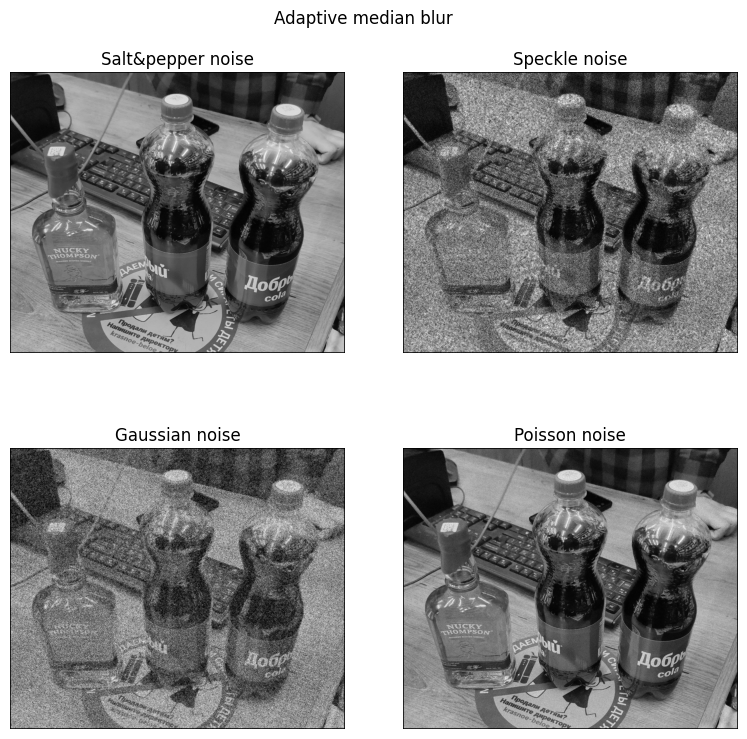

In [ ]:
s_max = 7
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Adaptive median blur')
fig.tight_layout()
plt.sca(axs[0][0])
plt.title('Salt&pepper noise')
I_amedfilt_sp = adaptive_median_filter(I_sp, S_max=s_max)
plt.imshow(I_amedfilt_sp, cmap='gray')
plt.axis('off')
plt.sca(axs[0][1])
plt.title('Speckle noise')
I_amedfilt_speckle = adaptive_median_filter(I_speckle, S_max=s_max)
plt.imshow(I_amedfilt_speckle, cmap='gray')
plt.axis('off')
plt.sca(axs[1][0])
plt.title('Gaussian noise')
I_amedfilt_gaussian = adaptive_median_filter(I_gaussian, S_max=s_max)
plt.imshow(I_amedfilt_gaussian, cmap='gray')
plt.axis('off')
plt.sca(axs[1][1])
plt.title('Poisson noise')
I_amedfilt_poisson = adaptive_median_filter(I_poisson, S_max=s_max)
plt.imshow(I_amedfilt_poisson, cmap='gray')
plt.axis('off')

### Ранговая фильтрация

(-0.5, 1279.5, 1073.5, -0.5)

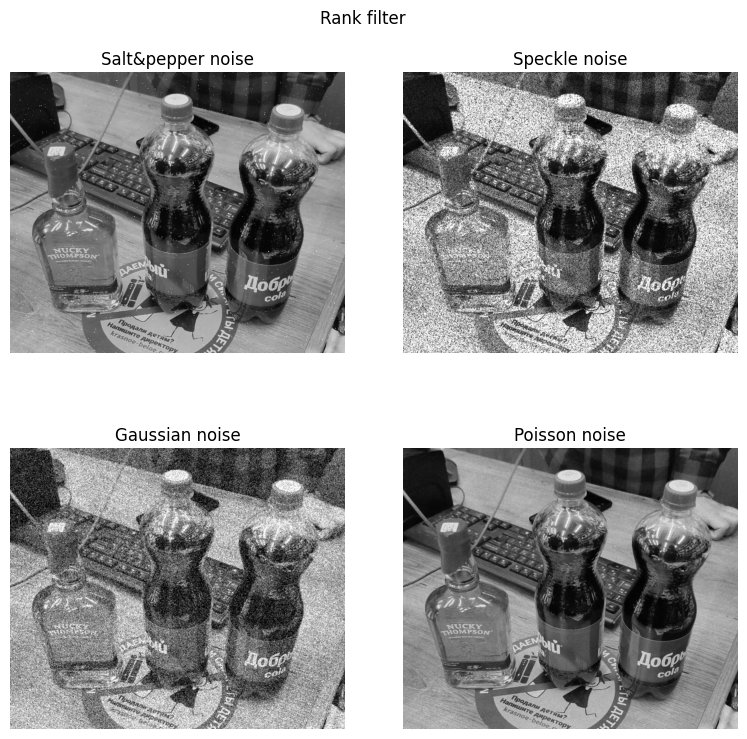

In [ ]:
r = 5
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Rank filter')
fig.tight_layout()
plt.sca(axs[0][0])
plt.title('Salt&pepper noise')
I_rankfilt_sp = scipy.ndimage.rank_filter(I_sp, footprint = np.ones((3,3)), rank=r)
plt.imshow(I_rankfilt_sp, cmap='gray')
plt.axis('off')
plt.sca(axs[0][1])
plt.title('Speckle noise')
I_rankfilt_speckle = scipy.ndimage.rank_filter(I_speckle, footprint = np.ones((3,3)), rank=r)
plt.imshow(I_rankfilt_speckle, cmap='gray')
plt.axis('off')
plt.sca(axs[1][0])
plt.title('Gaussian noise')
I_rankfilt_gaussian = scipy.ndimage.rank_filter(I_gaussian, footprint = np.ones((3,3)), rank=r)
plt.imshow(I_rankfilt_gaussian, cmap='gray')
plt.axis('off')
plt.sca(axs[1][1])
plt.title('Poisson noise')
I_rankfilt_poisson = scipy.ndimage.rank_filter(I_poisson, footprint = np.ones((3,3)), rank=r)
plt.imshow(I_rankfilt_poisson, cmap='gray')
plt.axis('off')

### Винеровская фильтрация

(-0.5, 1279.5, 1073.5, -0.5)

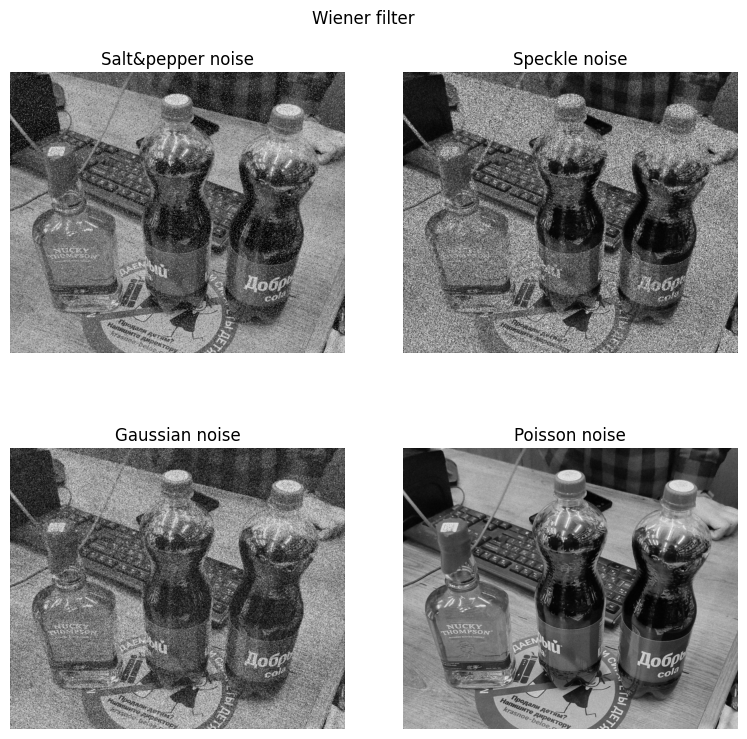

In [ ]:
I_wienerfilt = scipy.signal.wiener(I_sp)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Wiener filter')
fig.tight_layout()
plt.sca(axs[0][0])
plt.title('Salt&pepper noise')
I_wienerfilt_sp = scipy.signal.wiener(I_sp)
plt.imshow(I_wienerfilt_sp, cmap='gray')
plt.axis('off')
plt.sca(axs[0][1])
plt.title('Speckle noise')
I_wienerfilt_speckle = scipy.signal.wiener(I_speckle)
plt.imshow(I_wienerfilt_speckle, cmap='gray')
plt.axis('off')
plt.sca(axs[1][0])
plt.title('Gaussian noise')
I_wienerfilt_gaussian = scipy.signal.wiener(I_gaussian)
plt.imshow(I_wienerfilt_gaussian, cmap='gray')
plt.axis('off')
plt.sca(axs[1][1])
plt.title('Poisson noise')
I_wienerfilt_poisson = scipy.signal.wiener(I_poisson)
plt.imshow(I_wienerfilt_poisson, cmap='gray')
plt.axis('off')

## Высокочастотная фильтрация

### Фильтр Робертса

(-0.5, 1279.5, 1073.5, -0.5)

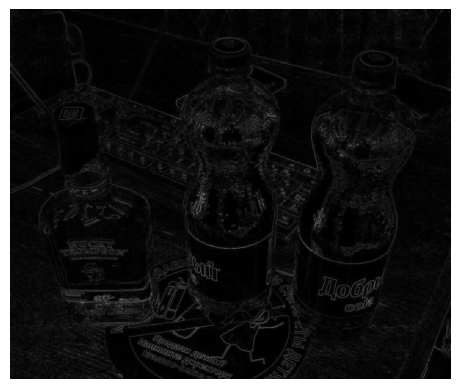

In [ ]:
G_x = np.array([[1, -1], [0, 0]])
G_y = np.array([[1, 0], [-1, 0]])
I_x = cv.filter2D(I.astype('float32'), -1, G_x)
I_y = cv.filter2D(I.astype('float32'), -1, G_y)
I_robertsfilt = cv.magnitude(I_x, I_y)
plt.imshow(I_robertsfilt, cmap='gray')
plt.axis('off')

### Фильтр Превитта

(-0.5, 1279.5, 1073.5, -0.5)

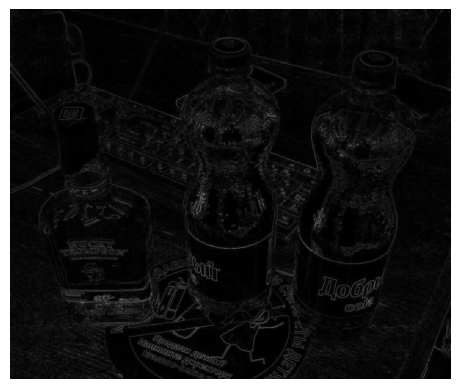

In [ ]:
G_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
G_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
I_x = cv.filter2D(I.astype('float32'), -1, G_x)
I_y = cv.filter2D(I.astype('float32'), -1, G_y)
I_previttfilt = cv.magnitude(I_x, I_y)
plt.imshow(I_robertsfilt, cmap='gray')
plt.axis('off')

### Фильтр Собела

(-0.5, 1279.5, 1073.5, -0.5)

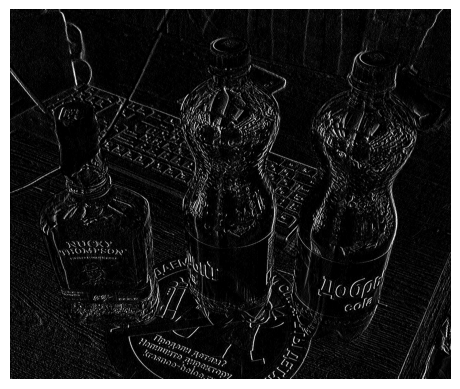

In [ ]:
I_sobelfilt = cv.Sobel(I, cv.CV_8U, 1, 0)
plt.imshow(I_sobelfilt, cmap='gray')
plt.axis('off')

### Фильтр Лапласа

(-0.5, 1279.5, 1073.5, -0.5)

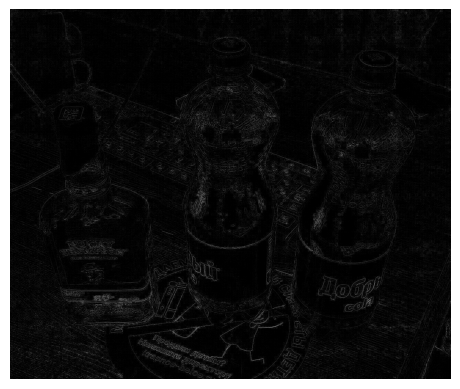

In [ ]:
I_laplacefilt = cv.Laplacian(I, cv.CV_8U)
plt.imshow(I_laplacefilt, cmap='gray')
plt.axis('off')

### Алгоритм Кэнни

(-0.5, 1279.5, 1073.5, -0.5)

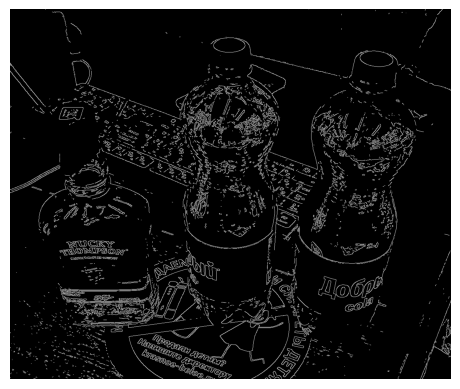

In [ ]:
I_cannyfilt = cv.Canny(I, 200 , 255)
plt.imshow(I_cannyfilt, cmap='gray')
plt.axis('off')

### Все фильтры вместе

(-0.5, 1279.5, 1073.5, -0.5)

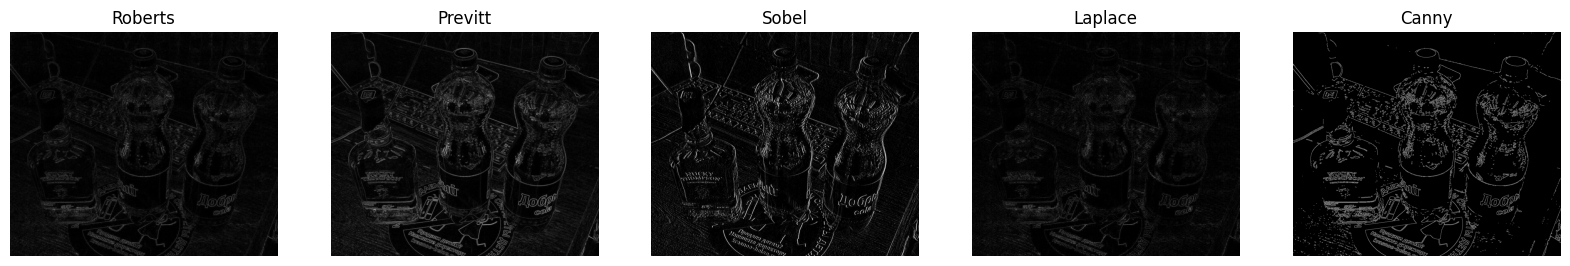

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
plt.sca(axs[0])
plt.title('Roberts')
plt.imshow(I_robertsfilt, cmap='gray')
plt.axis('off')
plt.sca(axs[1])
plt.title('Previtt')
plt.imshow(I_previttfilt, cmap='gray')
plt.axis('off')
plt.sca(axs[2])
plt.title('Sobel')
plt.imshow(I_sobelfilt, cmap='gray')
plt.axis('off')
plt.sca(axs[3])
plt.title('Laplace')
plt.imshow(I_laplacefilt, cmap='gray')
plt.axis('off')
plt.sca(axs[4])
plt.title('Canny')
plt.imshow(I_cannyfilt, cmap='gray')
plt.axis('off')